## Features from Accelarated Segment Test (FAST)
***

Embora  o  SURF  seja  mais  rápido  do  que  o  SIFT,  não  é  rápido  o  suficiente  para  um sistema em tempo real, especialmente quando existem restrições de recursos. Quando você está criando um aplicativo em tempo real em um dispositivo móvel, você não terá o luxo de usar o SURF para fazer cálculos em tempo real. Precisamos de algo que seja muito rápido e computacionalmente  barato.  Assim,  Rosten  e  Drummond criaram com  FAST.  Como  o  nome indica, é muito rápido! Em vez de passar por todos os cálculos, eles criaram um teste de alta velocidade  para  determinar  rapidamente  se  o  ponto  atual  é  um  ponto  chave  potencial. Precisamos notar que FAST é apenas para detecção de pontos-chave. Uma vez detectados os pontos-chave,  precisamos  usar SIFT  ou  SURF  para  computar  os  descritores. Considere  a seguinte imagem:

![img](https://user-images.githubusercontent.com/14116020/65011572-5e723280-d8ea-11e9-8ad8-dd8ed1eef7f4.png)

Se executarmos o detector de ponto-chave FAST nesta imagem, você verá algo como isto:

![img](https://user-images.githubusercontent.com/14116020/65011604-75188980-d8ea-11e9-9f54-f662e836a903.png)

Se o limparmos e suprimiremos os pontos-chave sem importância, ficará assim:

![img](https://user-images.githubusercontent.com/14116020/65011630-8d88a400-d8ea-11e9-9e68-c892cba5d5ed.png)

***

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2


def show(img, title=""):
    """
    Redimensionar a imagem e mostrar no codigo.
    """

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.rcParams['figure.figsize'] = (50, 50)
    plt.title(title, fontdict={"fontsize": 100})
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [2]:
# Carrega e converte para escala de cinza
image = cv2.imread("imagens/book.jpg")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [3]:
# Detecta FAST Keypoints
detector = cv2.FastFeatureDetector_create()
kps = detector.detect(gray)
print("Número de keypoints: {}".format(len(kps)))

Número de keypoints: 1218


In [4]:
# Loop pelo keypoints e desenha na imagem
for kp in kps:
    r = int(0.5 * kp.size)
    (x, y) = np.int0(kp.pt)
    cv2.circle(image, (x, y), r, (0, 255, 255), 2)

In [5]:
# Print parâmetros
print("Threshold: ", detector.getThreshold())
print("nonmaxSuppression: ", detector.getNonmaxSuppression())
print("neighborhood: ", detector.getType())
print("Total Keypoints with nonmaxSuppression: ", len(kps))

Threshold:  10
nonmaxSuppression:  True
neighborhood:  2
Total Keypoints with nonmaxSuppression:  1218


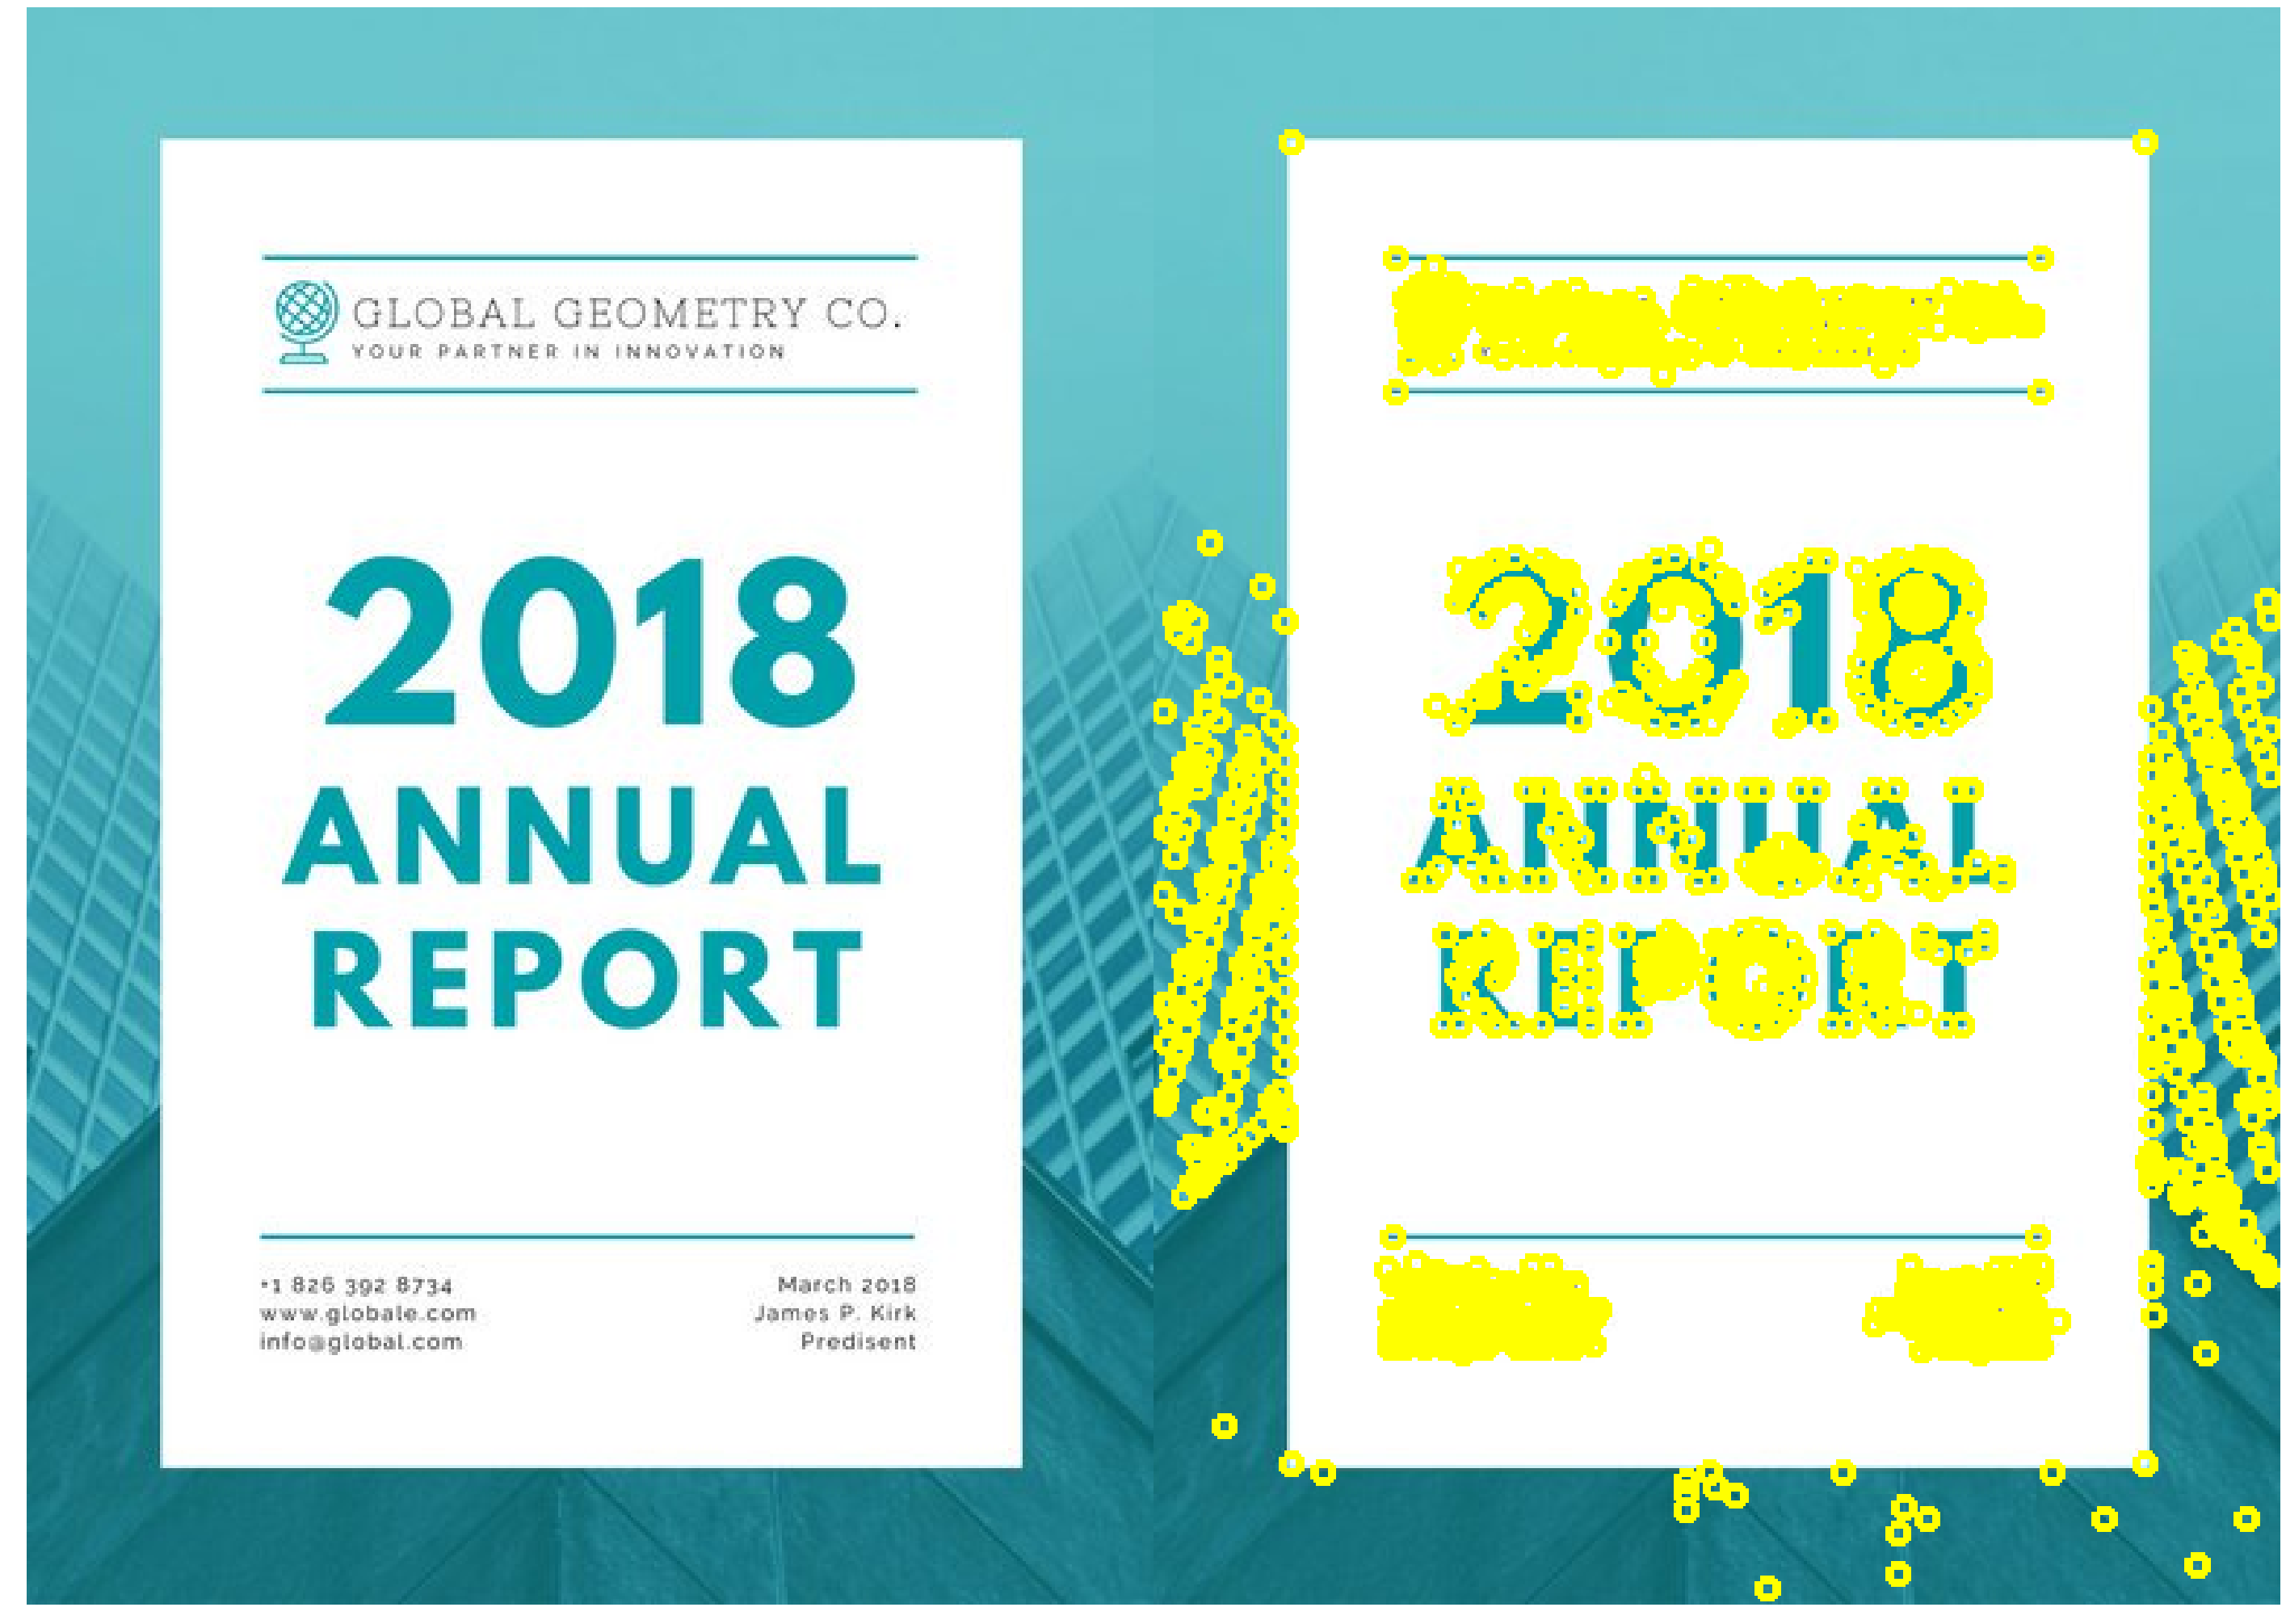

In [6]:
# Print
show(np.hstack([orig, image]))